In [1]:
import pandas as pd
import numpy as np
import json

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [25]:
from scripts.data_cleaning import read_all_csvs

In [2]:
# df1 = pd.read_csv('data/Kickstarter000.csv')
# df1

,backers_count,blurb,category,converted_pledged_amount,country,created_at,creator,currency,currency_symbol,currency_trailing_code,...,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type
0,21,2006 was almost 7 years ago.... Can you believ...,"{""id"":43,""name"":""Rock"",""slug"":""music/rock"",""po...",802,US,1387659690,"{""id"":1495925645,""name"":""Daniel"",""is_registere...",USD,$,True,...,new-final-round-album,https://www.kickstarter.com/discover/categorie...,True,False,successful,1391899046,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",802.00000,international
1,97,An adorable fantasy enamel pin series of princ...,"{""id"":54,""name"":""Mixed Media"",""slug"":""art/mixe...",2259,US,1549659768,"{""id"":1175589980,""name"":""Katherine"",""slug"":""fr...",USD,$,True,...,princess-pals-enamel-pin-series,https://www.kickstarter.com/discover/categorie...,True,False,successful,1551801611,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",2259.00000,international
2,88,Helping a community come together to set the s...,"{""id"":280,""name"":""Photobooks"",""slug"":""photogra...",29638,US,1477242384,"{""id"":1196856269,""name"":""MelissaThomas"",""is_re...",USD,$,True,...,their-life-through-their-lens-the-amish-and-me...,https://www.kickstarter.com/discover/categorie...,True,True,successful,1480607932,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",29638.00000,international
3,193,Every revolution starts from the bottom and we...,"{""id"":266,""name"":""Footwear"",""slug"":""fashion/fo...",49158,IT,1540369920,"{""id"":1569700626,""name"":""WAO"",""slug"":""wearewao...",EUR,€,False,...,wao-the-eco-effect-shoes,https://www.kickstarter.com/discover/categorie...,True,False,successful,1544309940,1.136525,"{""web"":{""project"":""https://www.kickstarter.com...",49075.15252,international
4,20,Learn to build 10+ Applications in this comple...,"{""id"":51,""name"":""Software"",""slug"":""technology/...",549,US,1425706517,"{""id"":1870845385,""name"":""Kalpit Jain"",""is_regi...",USD,$,True,...,apple-watch-development-course,https://www.kickstarter.com/discover/categorie...,False,False,failed,1428511019,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",549.00000,domestic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3774,10,"This is a collaborative effort at recording, m...","{""id"":316,""name"":""Blues"",""slug"":""music/blues"",...",506,US,1454527113,"{""id"":1000214737,""name"":""Penny D Marcucci"",""is...",USD,$,True,...,the-penny-d-project,https://www.kickstarter.com/discover/categorie...,False,False,failed,1459716419,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",506.00000,domestic
3775,472,Get your own Mimic Chest containing dice vault...,"{""id"":270,""name"":""Gaming Hardware"",""slug"":""gam...",75790,US,1506288614,"{""id"":1342562240,""name"":""Polymorph Crafts"",""sl...",USD,$,True,...,the-mimic-chest-your-rpg-carry-all-with-dice-t...,https://www.kickstarter.com/discover/categorie...,True,False,successful,1510934334,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",75790.00000,international
3776,35,"A new animated, workplace comedy series about ...","{""id"":29,""name"":""Animation"",""slug"":""film & vid...",2346,US,1336120969,"{""id"":765327036,""name"":""Daran Carlin-Weber"",""i...",USD,$,True,...,summer-rec-pilot-episode,https://www.kickstarter.com/discover/categorie...,False,False,failed,1339046590,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",2346.00000,international
3777,13,a thesis film following the emotional life of ...,"{""id"":32,""name"":""Shorts"",""slug"":""film & video/...",1901,US,1537154407,"{""id"":1521393087,""name"":""Carolyn Ramella"",""is_...",USD,$,True,...,its-not-about-you-undergraduate-student-thesis...,https://www.kickstarter.com/discover/categorie...,True,False,successful,1543349869,1.000000,

In [26]:
df1 = read_all_csvs()

In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209222 entries, 0 to 964
Data columns (total 37 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   backers_count             209222 non-null  int64  
 1   blurb                     209214 non-null  object 
 2   category                  209222 non-null  object 
 3   converted_pledged_amount  209222 non-null  int64  
 4   country                   209222 non-null  object 
 5   created_at                209222 non-null  int64  
 6   creator                   209222 non-null  object 
 7   currency                  209222 non-null  object 
 8   currency_symbol           209222 non-null  object 
 9   currency_trailing_code    209222 non-null  bool   
 10  current_currency          209222 non-null  object 
 11  deadline                  209222 non-null  int64  
 12  disable_communication     209222 non-null  bool   
 13  friends                   300 non-null     obje

In [28]:
df1.category

0      {"id":43,"name":"Rock","slug":"music/rock","po...
1      {"id":54,"name":"Mixed Media","slug":"art/mixe...
2      {"id":280,"name":"Photobooks","slug":"photogra...
3      {"id":266,"name":"Footwear","slug":"fashion/fo...
4      {"id":51,"name":"Software","slug":"technology/...
                             ...                        
960    {"id":307,"name":"Drinks","slug":"food/drinks"...
961    {"id":306,"name":"Cookbooks","slug":"food/cook...
962    {"id":264,"name":"Childrenswear","slug":"fashi...
963    {"id":46,"name":"Children's Books","slug":"pub...
964    {"id":23,"name":"Painting","slug":"art/paintin...
Name: category, Length: 209222, dtype: object

In [29]:
#How to convert the relevant entries from the category column into new columns
test_category = (df1.iloc[1,2])
print(test_category)

test_dict = json.loads(test_category)
print(test_dict)

category = test_dict['slug'].split('/')[0]
print(category)

subcategory = test_dict['name']
print(subcategory)

{"id":54,"name":"Mixed Media","slug":"art/mixed media","position":6,"parent_id":1,"color":16760235,"urls":{"web":{"discover":"http://www.kickstarter.com/discover/categories/art/mixed%20media"}}}
{'id': 54, 'name': 'Mixed Media', 'slug': 'art/mixed media', 'position': 6, 'parent_id': 1, 'color': 16760235, 'urls': {'web': {'discover': 'http://www.kickstarter.com/discover/categories/art/mixed%20media'}}}
art
Mixed Media


In [30]:
#Turns all the entries in the category column from strings to dicts
df1.category = df1.category.apply(lambda x: json.loads(x))

In [31]:
#Takes all the categories and saves them in a new column
df1['cat'] = df1.category.apply(lambda x: x['slug'].split('/')[0])

In [32]:
#Takes all the subcategories and saves them in a new column
df1['subcat'] = df1['category'].apply(lambda x: x.get('name'))

In [9]:
##Turns all the entries in the creator column from strings to dicts
#df1.creator = df1.creator.apply(lambda x: json.loads(x))

In [33]:
#Test implementation to get the creator name from the creator column
test_creator = df1.creator[0]

test_creator

lst = test_creator.split(",")

lst

lst[1]

print(lst[1].split(":")[1])

0    {"id":1495925645,"name":"Daniel","is_registere...
0    {"id":1322978446,"name":"Harley Boden","is_reg...
0    {"id":578954520,"name":"Blent","slug":"blent",...
0    {"id":303880739,"name":"The Bellwether Syndica...
0    {"id":1893302164,"name":"Gregory Wolfson (dele...
0    {"id":724001684,"name":"Grace Peters","is_regi...
0    {"id":270572750,"name":"Mike Scully","slug":"l...
0    {"id":37572539,"name":"Doug Roos","slug":"doug...
0    {"id":1305160350,"name":"Lloyd Metcalf","slug"...
0    {"id":1450797017,"name":"Tawny Fritz","is_regi...
0    {"id":942533263,"name":"chris clavin","is_regi...
0    {"id":643448596,"name":"Kevin Gosselin","is_re...
0    {"id":1276818838,"name":"Randall Stoltzfus","i...
0    {"id":2022617377,"name":"Purusha K. Radha","is...
0    {"id":429482052,"name":"Blake Bogosian","is_re...
0    {"id":352899185,"name":"mcchris","slug":"mcchr...
0    {"id":1104845974,"name":"M. De Franco (MDSW)",...
0    {"id":2017737899,"name":"Mike Hastert","is_reg...
0    {"id"

AttributeError: 'Series' object has no attribute 'split'

In [34]:
#get the creator name from the creator column
df1['creator_name'] = df1.creator.apply(lambda x: x.split(",")[1].split(":")[1])

In [35]:
df1.location

0      {"id":2379574,"name":"Chicago","slug":"chicago...
1      {"id":2486340,"name":"Sacramento","slug":"sacr...
2      {"id":2383660,"name":"Columbus","slug":"columb...
3      {"id":725746,"name":"Venice","slug":"venice-ve...
4      {"id":2479651,"name":"Redmond","slug":"redmond...
                             ...                        
960    {"id":2445043,"name":"Manteno","slug":"manteno...
961    {"id":1105779,"name":"Sydney","slug":"sydney-a...
962    {"id":2393370,"name":"Dover","slug":"dover-de"...
963    {"id":2457170,"name":"Nashville","slug":"nashv...
964    {"id":44418,"name":"London","slug":"london-gb"...
Name: location, Length: 209222, dtype: object

In [36]:
df1.location[1].split(",")[1].split(":")[1]

AttributeError: 'Series' object has no attribute 'split'

In [14]:
#df1.dropna(axis = 0, inplace=True)

In [37]:
df1 = df1[df1['location'].notna()]

In [38]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208996 entries, 0 to 964
Data columns (total 40 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   backers_count             208996 non-null  int64  
 1   blurb                     208988 non-null  object 
 2   category                  208996 non-null  object 
 3   converted_pledged_amount  208996 non-null  int64  
 4   country                   208996 non-null  object 
 5   created_at                208996 non-null  int64  
 6   creator                   208996 non-null  object 
 7   currency                  208996 non-null  object 
 8   currency_symbol           208996 non-null  object 
 9   currency_trailing_code    208996 non-null  bool   
 10  current_currency          208996 non-null  object 
 11  deadline                  208996 non-null  int64  
 12  disable_communication     208996 non-null  bool   
 13  friends                   300 non-null     obje

In [39]:

df1.location = df1.location.apply(lambda x: json.loads(x))

df1['creator_city'] = df1['location'].apply(lambda x: x.get('name'))

df1

,backers_count,blurb,category,converted_pledged_amount,country,created_at,creator,currency,currency_symbol,currency_trailing_code,...,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type,cat,subcat,creator_name,creator_city
0,21,2006 was almost 7 years ago.... Can you believ...,"{'id': 43, 'name': 'Rock', 'slug': 'music/rock...",802,US,1387659690,"{""id"":1495925645,""name"":""Daniel"",""is_registere...",USD,$,True,...,successful,1391899046,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",802.000000,international,music,Rock,"""Daniel""",Chicago
1,97,An adorable fantasy enamel pin series of princ...,"{'id': 54, 'name': 'Mixed Media', 'slug': 'art...",2259,US,1549659768,"{""id"":1175589980,""name"":""Katherine"",""slug"":""fr...",USD,$,True,...,successful,1551801611,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",2259.000000,international,art,Mixed Media,"""Katherine""",Sacramento
2,88,Helping a community come together to set the s...,"{'id': 280, 'name': 'Photobooks', 'slug': 'pho...",29638,US,1477242384,"{""id"":1196856269,""name"":""MelissaThomas"",""is_re...",USD,$,True,...,successful,1480607932,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",29638.000000,international,photography,Photobooks,"""MelissaThomas""",Columbus
3,193,Every revolution starts from the bottom and we...,"{'id': 266, 'name': 'Footwear', 'slug': 'fashi...",49158,IT,1540369920,"{""id"":1569700626,""name"":""WAO"",""slug"":""wearewao...",EUR,€,False,...,successful,1544309940,1.136525,"{""web"":{""project"":""https://www.kickstarter.com...",49075.152520,international,fashion,Footwear,"""WAO""",Venice
4,20,Learn to build 10+ Applications in this comple...,"{'id': 51, 'name': 'Software', 'slug': 'techno...",549,US,1425706517,"{""id"":1870845385,""name"":""Kalpit Jain"",""is_regi...",USD,$,True,...,failed,1428511019,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",549.000000,domestic,technology,Software,"""Kalpit Jain""",Redmond
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,57,Steam Hollow is a Veteran owned Craft Brewery ...,"{'id': 307, 'name': 'Drinks', 'slug': 'food/dr...",10320,US,1487697908,"{""id"":86849824,""name"":""Blane White"",""slug"":""st...",USD,$,True,...,successful,1492171945,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",10320.000000,international,food,Drinks,"""Blane White""",Manteno
961,11,Over 250 healthy recipes free from ANY added S...,"{'id': 306, 'name': 'Cookbooks', 'slug': 'food...",305,AU,1450753265,"{""id"":1899017630,""name"":""Alan Wichert"",""is_reg...",AUD,$,True,...,failed,1453713310,0.727575,"{""web"":{""project"":""https://www.kickstarter.com...",316.495068,domestic,food,Cookbooks,"""Alan Wichert""",Sydney
962,0,"Give your baby style and flair with ""Gorgeous ...","{'id': 264, 'name': 'Childrenswear', 'slug': '...",0,US,1470991682,"{""id"":1589905505,""name"":""T. Simms"",""slug"":""1pr...",USD,$,True,...,failed,1474837755,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",0.000000,international,fashion,Childrenswear,"""T. Simms""",Dover
963,11,"""The Lion & the Lyceum"" is a children's book a...","{'id': 46, 'name': 'Children's Books', 'slug':...",1400,US,1424101898,"{""id"":1468696154,""name"":""Alex Beene"",""is_regis...",USD,$,True,...,successful,1426741214,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",1400.000000,domestic,publishing,Children's Books,"""Alex Beene""",Nashville


In [40]:
df1.subcat.isnull().sum()

0

In [41]:
df1.subcat.unique()

array(['Rock', 'Mixed Media', 'Photobooks', 'Footwear', 'Software',
       'Accessories', 'Nonfiction', 'Sculpture', 'Playing Cards',
       'Fine Art', 'Restaurants', 'Nature', 'Festivals',
       'Classical Music', 'Small Batch', 'Musical', 'Country & Folk',
       'Theater', 'Plays', 'Apparel', 'Photography', 'Workshops', 'R&B',
       'Pop', 'Music', 'Jazz', 'Experimental', 'Performance Art',
       'Places', 'Comedy', 'Animals', 'Indie Rock', 'People', 'Fashion',
       'Immersive', 'Metal', 'Crafts', 'Spaces', 'Faith', 'Pet Fashion',
       'Jewelry', 'Ready-to-wear', 'Live Games', 'Couture', 'Web',
       'Video Games', 'Art Books', 'Hardware', 'Farms', 'Technology',
       'Drama', 'Mobile Games', 'Tabletop Games', 'Electronic Music',
       'Video', '3D Printing', 'DIY Electronics', 'Radio & Podcasts',
       'Horror', 'Journalism', 'Webcomics', 'Print', 'Audio',
       'Space Exploration', 'Events', 'Sound', 'Apps', 'Gadgets', 'Games',
       'Photo', 'Puzzles', 'Candles', 'C

In [42]:
df1

,backers_count,blurb,category,converted_pledged_amount,country,created_at,creator,currency,currency_symbol,currency_trailing_code,...,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type,cat,subcat,creator_name,creator_city
0,21,2006 was almost 7 years ago.... Can you believ...,"{'id': 43, 'name': 'Rock', 'slug': 'music/rock...",802,US,1387659690,"{""id"":1495925645,""name"":""Daniel"",""is_registere...",USD,$,True,...,successful,1391899046,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",802.000000,international,music,Rock,"""Daniel""",Chicago
1,97,An adorable fantasy enamel pin series of princ...,"{'id': 54, 'name': 'Mixed Media', 'slug': 'art...",2259,US,1549659768,"{""id"":1175589980,""name"":""Katherine"",""slug"":""fr...",USD,$,True,...,successful,1551801611,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",2259.000000,international,art,Mixed Media,"""Katherine""",Sacramento
2,88,Helping a community come together to set the s...,"{'id': 280, 'name': 'Photobooks', 'slug': 'pho...",29638,US,1477242384,"{""id"":1196856269,""name"":""MelissaThomas"",""is_re...",USD,$,True,...,successful,1480607932,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",29638.000000,international,photography,Photobooks,"""MelissaThomas""",Columbus
3,193,Every revolution starts from the bottom and we...,"{'id': 266, 'name': 'Footwear', 'slug': 'fashi...",49158,IT,1540369920,"{""id"":1569700626,""name"":""WAO"",""slug"":""wearewao...",EUR,€,False,...,successful,1544309940,1.136525,"{""web"":{""project"":""https://www.kickstarter.com...",49075.152520,international,fashion,Footwear,"""WAO""",Venice
4,20,Learn to build 10+ Applications in this comple...,"{'id': 51, 'name': 'Software', 'slug': 'techno...",549,US,1425706517,"{""id"":1870845385,""name"":""Kalpit Jain"",""is_regi...",USD,$,True,...,failed,1428511019,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",549.000000,domestic,technology,Software,"""Kalpit Jain""",Redmond
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,57,Steam Hollow is a Veteran owned Craft Brewery ...,"{'id': 307, 'name': 'Drinks', 'slug': 'food/dr...",10320,US,1487697908,"{""id"":86849824,""name"":""Blane White"",""slug"":""st...",USD,$,True,...,successful,1492171945,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",10320.000000,international,food,Drinks,"""Blane White""",Manteno
961,11,Over 250 healthy recipes free from ANY added S...,"{'id': 306, 'name': 'Cookbooks', 'slug': 'food...",305,AU,1450753265,"{""id"":1899017630,""name"":""Alan Wichert"",""is_reg...",AUD,$,True,...,failed,1453713310,0.727575,"{""web"":{""project"":""https://www.kickstarter.com...",316.495068,domestic,food,Cookbooks,"""Alan Wichert""",Sydney
962,0,"Give your baby style and flair with ""Gorgeous ...","{'id': 264, 'name': 'Childrenswear', 'slug': '...",0,US,1470991682,"{""id"":1589905505,""name"":""T. Simms"",""slug"":""1pr...",USD,$,True,...,failed,1474837755,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",0.000000,international,fashion,Childrenswear,"""T. Simms""",Dover
963,11,"""The Lion & the Lyceum"" is a children's book a...","{'id': 46, 'name': 'Children's Books', 'slug':...",1400,US,1424101898,"{""id"":1468696154,""name"":""Alex Beene"",""is_regis...",USD,$,True,...,successful,1426741214,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",1400.000000,domestic,publishing,Children's Books,"""Alex Beene""",Nashville


In [43]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208996 entries, 0 to 964
Data columns (total 41 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   backers_count             208996 non-null  int64  
 1   blurb                     208988 non-null  object 
 2   category                  208996 non-null  object 
 3   converted_pledged_amount  208996 non-null  int64  
 4   country                   208996 non-null  object 
 5   created_at                208996 non-null  int64  
 6   creator                   208996 non-null  object 
 7   currency                  208996 non-null  object 
 8   currency_symbol           208996 non-null  object 
 9   currency_trailing_code    208996 non-null  bool   
 10  current_currency          208996 non-null  object 
 11  deadline                  208996 non-null  int64  
 12  disable_communication     208996 non-null  bool   
 13  friends                   300 non-null     obje

In [44]:
list_of_subcategories = df1.subcat.tolist()

In [49]:
len(df1.subcat.unique())

159

In [66]:
df1.subcat.unique()

array(['Rock', 'Mixed Media', 'Photobooks', 'Footwear', 'Software',
       'Accessories', 'Nonfiction', 'Sculpture', 'Playing Cards',
       'Fine Art', 'Restaurants', 'Nature', 'Festivals',
       'Classical Music', 'Small Batch', 'Musical', 'Country & Folk',
       'Theater', 'Plays', 'Apparel', 'Photography', 'Workshops', 'R&B',
       'Pop', 'Music', 'Jazz', 'Experimental', 'Performance Art',
       'Places', 'Comedy', 'Animals', 'Indie Rock', 'People', 'Fashion',
       'Immersive', 'Metal', 'Crafts', 'Spaces', 'Faith', 'Pet Fashion',
       'Jewelry', 'Ready-to-wear', 'Live Games', 'Couture', 'Web',
       'Video Games', 'Art Books', 'Hardware', 'Farms', 'Technology',
       'Drama', 'Mobile Games', 'Tabletop Games', 'Electronic Music',
       'Video', '3D Printing', 'DIY Electronics', 'Radio & Podcasts',
       'Horror', 'Journalism', 'Webcomics', 'Print', 'Audio',
       'Space Exploration', 'Events', 'Sound', 'Apps', 'Gadgets', 'Games',
       'Photo', 'Puzzles', 'Candles', 'C

In [65]:
len(df1.cat.unique())

15

In [67]:
new_list_of_subcats = ['Rock', 'Mixed Media', 'Photobooks', 'Footwear', 'Software',
       'Accessories', 'Nonfiction', 'Sculpture', 'Playing Cards',
       'Fine Art', 'Restaurants', 'Nature', 'Festivals',
       'Classical Music', 'Small Batch', 'Musical', 'Country & Folk',
       'Theater', 'Plays', 'Apparel', 'Photography', 'Workshops', 'R&B',
       'Pop', 'Music', 'Jazz', 'Experimental', 'Performance Art',
       'Places', 'Comedy', 'Animals', 'Indie Rock', 'People', 'Fashion',
       'Immersive', 'Metal', 'Crafts', 'Spaces', 'Faith', 'Pet Fashion',
       'Jewelry', 'Ready-to-wear', 'Live Games', 'Couture', 'Web',
       'Video Games', 'Art Books', 'Hardware', 'Farms', 'Technology',
       'Drama', 'Mobile Games', 'Tabletop Games', 'Electronic Music',
       'Video', '3D Printing', 'DIY Electronics', 'Radio & Podcasts',
       'Horror', 'Journalism', 'Webcomics', 'Print', 'Audio',
       'Space Exploration', 'Events', 'Sound', 'Apps', 'Gadgets', 'Games',
       'Photo', 'Puzzles', 'Candles', 'Childrenswear', 'Graphic Design',
       'Anthologies', 'Narrative Film', 'Performances', 'Taxidermy',
       'Civic Design', 'Television', 'Camera Equipment', 'Printing',
       'Robots', 'Wearables', 'Video Art', 'Literary Spaces', 'Shorts',
       'Science Fiction', 'Public Art', 'Comic Books', 'Fiction', 'Dance',
       'Calendars', 'Comics', 'Residencies', 'Family', 'Flight',
       'Embroidery', 'Interactive Design', 'Hip-Hop', 'Academic',
       "Children's Books", 'Product Design', 'Illustration',
       'Conceptual Art', 'Cookbooks', 'Latin', 'Food', 'Action',
       'Ceramics', 'Music Videos', 'World Music', 'Community Gardens',
       'Fantasy', 'Food Trucks', 'Thrillers', 'Movie Theaters', 'Romance',
       'Digital Art', 'Typography', 'Drinks', 'Stationery', 'Design',
       'Art', 'Vegan', 'Crochet', "Farmer's Markets", 'Graphic Novels',
       'Poetry', 'Documentary', 'Translations', 'Installations',
       'Chiptune', 'Zines', 'Pottery', 'Painting', 'Webseries',
       'Makerspaces', 'Publishing', 'Letterpress', 'Literary Journals',
       'Textiles', 'Punk', 'Fabrication Tools', 'Bacon', 'Young Adult',
       'Periodicals', 'Woodworking', 'Animation', 'DIY', 'Architecture',
       'Glass', 'Blues', 'Gaming Hardware', 'Film & Video', 'Kids',
       'Knitting', 'Weaving', 'Quilts']

In [85]:
df1 = df1[df1['state'] != 'live']

---
---
## Baseline model

### Dummy classifier

In [86]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, f1_score, fbeta_score

In [98]:
from sklearn.metrics import fbeta_score

In [87]:
features = df1.columns.to_list()
features.remove('state')
X = df1[features]
y = df1.state

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True, stratify=y)

0.5815952136978151


/Users/jensreich/neuefische/ds-ml-project-kickstarter/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jensreich/neuefische/ds-ml-project-kickstarter/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jensreich/neuefische/ds-ml-project-kickstarter/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter t

              precision    recall  f1-score   support

    canceled       0.00      0.00      0.00      2584
      failed       0.00      0.00      0.00     22545
  successful       0.58      1.00      0.74     35190
   suspended       0.00      0.00      0.00       187

    accuracy                           0.58     60506
   macro avg       0.15      0.25      0.18     60506
weighted avg       0.34      0.58      0.43     60506

--------------------------------------------------------------------------------


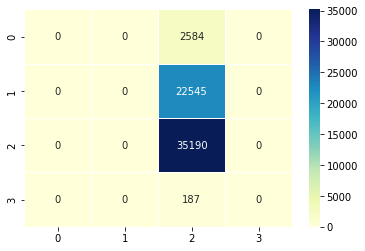

In [111]:
# Use DummyClassifier as a baseline model
dummy_clf = DummyClassifier(strategy="prior")
dummy_clf.fit(X_train, y_train)
y_predict = dummy_clf.predict(X_test)
dummy_clf.score(y_predict, y_test).round(2)


print(fbeta_score(y_test, y_predict, beta = 2, average = 'micro'))

# Print classification report of our model
print(classification_report(y_test, y_predict))
print("--------"*10)

# Evaluate the model with a confusion matrix
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5);


[Text(0.5, 1.0, 'Baseline model prediction of kickstarter projects'),
 Text(0.5, 0, 'Predicted State'),
 Text(0, 0.5, 'Actual States')]

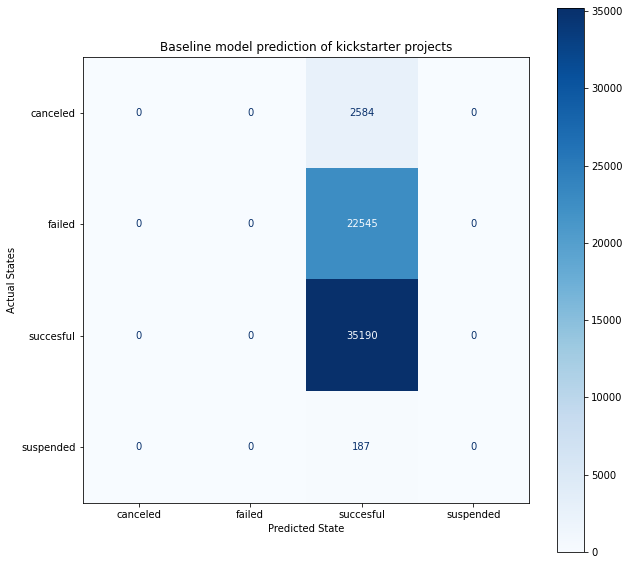

In [128]:
## Create the Confusion Matrix Display Object(cmd_obj). Note the 
## alphabetical sorting order of the labels.
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=['canceled', 'failed', 'succesful', 'suspended'])
## The plot() function has to be called for the sklearn visualization
## code to do its work and the Axes object to be created.
fig, ax = plt.subplots(figsize=(10,10))

cmd_obj.plot(ax=ax, cmap = 'Blues')
## Use the Axes attribute 'ax_' to get to the underlying Axes object.
## The Axes object controls the labels for the X and the Y axes. It
## also controls the title.


cmd_obj.ax_.set(
                title='Baseline model prediction of kickstarter projects', 
                xlabel='Predicted State', 
                ylabel='Actual States',
                )
## Finally, call the matplotlib show() function to display the visualization
## of the Confusion Matrix.
plt.show()

### Simple logistic regression

In [73]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred_train = log_reg.predict(X_train)
y_pred = log_reg.predict(X_test)

# Print accuracy of our model
print("Accuracy on train set:", round(accuracy_score(y_train, y_pred_train), 2))
print("Accuracy on test set:", round(accuracy_score(y_test, y_pred), 2))
print("--------"*10)

# Print classification report of our model
print(classification_report(y_test, y_pred))
print("--------"*10)

# Evaluate the model with a confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5);

ValueError: could not convert string to float: 'Tasteful Graffiti Art created on privately owned buildings. Permission to create the art is given by the building owners.'

In [ ]:
## Create the Confusion Matrix Display Object(cmd_obj). Note the 
## alphabetical sorting order of the labels.
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=['canceled', 'failed', 'succesful', 'suspended'])
## The plot() function has to be called for the sklearn visualization
## code to do its work and the Axes object to be created.
fig, ax = plt.subplots(figsize=(10,10))

cmd_obj.plot(ax=ax, cmap = 'Blues')
## Use the Axes attribute 'ax_' to get to the underlying Axes object.
## The Axes object controls the labels for the X and the Y axes. It
## also controls the title.


cmd_obj.ax_.set(
                title='Baseline model prediction of kickstarter projects', 
                xlabel='Predicted State', 
                ylabel='Actual States',
                )
## Finally, call the matplotlib show() function to display the visualization
## of the Confusion Matrix.
plt.show()

### Milestone 1:

Value of Product:
Save time
Earn money
Show funding opportunities

Stakeholder:
PPC consulter: aids PPCs (Potential Project Creators) in their project creation process and improves chances of success
This premium service is part of Kickstarter itself

Prediction:
Project was successful (Project funding goals are reached)

Evaluation Metric:
Classification problem

Score:
f_beta, more recall heavy

Baseline Model:
Our baseline models assumes that all projects are successful